# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

# Data Loading and Preprocessing

In [2]:
df=pd.read_csv("Advertising Budget and Sales.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Feature Selection and Train-Test Split

In [3]:
X=df[["TV Ad Budget ($)","Radio Ad Budget ($)","Newspaper Ad Budget ($)"]]
y=df[["Sales ($)"]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Model Training

In [4]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Inspecting Model Coefficients and Intercept

In [5]:
print(f"=> Slope/Coefficient of best fit line for TV Ad Budget ($) : {model.coef_[0][0]}")
print(f"=> Slope/Coefficient of best fit line for Radio Ad Budget ($): {model.coef_[0][1]}")
print(f"=> Slope/Coefficient of best fit line for Newspaper Ad Budget ($) : {model.coef_[0][2]}")
print(f"=> Intercept of best fit line : {model.intercept_[0]}")

=> Slope/Coefficient of best fit line for TV Ad Budget ($) : 0.0440592809574652
=> Slope/Coefficient of best fit line for Radio Ad Budget ($): 0.19928749689893954
=> Slope/Coefficient of best fit line for Newspaper Ad Budget ($) : 0.006882452222275458
=> Intercept of best fit line : 2.70894909251591


In [6]:
y_pred=model.predict(X_test)

# Model Evaluation

In [7]:
print(f"R2 Score for this data will be =:{r2_score(y_test,y_pred)}")
print("-"*100)
print(f"Mean Absolute Error for this Model =: {mean_absolute_error(y_test,y_pred)}")
print("-"*100)
print(f"Mean squared Error for this Model =: {mean_squared_error(y_test,y_pred)}")
print("-"*100)
print(f"Root Mean squared Error for this Model =: {root_mean_squared_error(y_test,y_pred)}")

R2 Score for this data will be =:0.8609466508230368
----------------------------------------------------------------------------------------------------
Mean Absolute Error for this Model =: 1.5116692224549084
----------------------------------------------------------------------------------------------------
Mean squared Error for this Model =: 3.79679723671522
----------------------------------------------------------------------------------------------------
Root Mean squared Error for this Model =: 1.9485372043446387


# Visualizing Model Fit: Actual vs. Predicted Sales

C:\Users\nayar\AppData\Local\Temp\ipykernel_1920\4230143406.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_val=max(y_test.max()[0],y_pred.max())
C:\Users\nayar\AppData\Local\Temp\ipykernel_1920\4230143406.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_val=max(y_test.min()[0],y_pred.min())


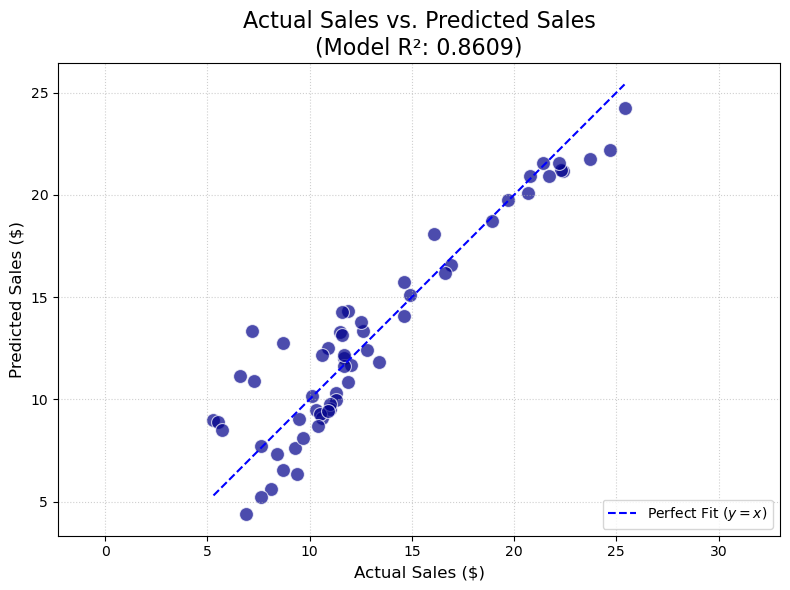

In [18]:
plt.figure(figsize=(8,6))
max_val=max(y_test.max()[0],y_pred.max())
min_val=max(y_test.min()[0],y_pred.min())
plt.plot([min_val,max_val],[min_val,max_val],c='blue',linestyle="--",label='Perfect Fit ($y=x$)')
sns.scatterplot(x=y_test.values.flatten(), y=y_pred.flatten(), color='darkblue', alpha=0.7,s=100) 
plt.title(f'Actual Sales vs. Predicted Sales\n(Model R²: {r2_score(y_test,y_pred):.4f})', fontsize=16)
plt.xlabel('Actual Sales ($)', fontsize=12)
plt.ylabel('Predicted Sales ($)', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True, linestyle=':', alpha=0.6)
plt.axis('equal')                  
plt.tight_layout()
plt.show()